# Machine Learning model with Keras and TensorFlow


#### Dataset used
    
    Iris flower (iris) dataset. 
    The dataset contains a set of 150 records under five attributes: 
    sepal length, sepal width, petal length, petal width, and class (known as target from sklearn datasets).

### 1. Sequential Model - most simple and most frequently used model
### 2. Functional API - for more complex models. In particular model with multiple inputs or outputs.

### Importing useful libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

## Exploring Data

### Preparing Pandas Datafame

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Convert datatype to float
df = df.astype(float)

# append "target" and name it "label"
df['label'] = iris.target

# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Preparing data for Keras and TensorFlow

Converting categorical feature to one-hot encoding. 

In [5]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'])
label.columns = ['label_' + str(x) for x in label.columns]
df = pd.concat([df, label], axis=1)

# drop old label
df.drop(['label'], axis=1, inplace=True)

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


    Creating X and y. 
    Keras and TensorFlow 2.0 take in Numpy array as inputs, converting DataFrame back to Numpy array.

*Core python, numpy, pandas, sklearn, keras and tensorflow, there will be no compatibility problem in these.*


In [7]:
# Creating X and y

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)

y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)

Finally, let’s split the dataset into a training set (75%)and a test set (25%) using train_test_split() from sklearn library

In [8]:
# Split the data set in a training set (75%) and a test set (25%)
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.25
)

In [9]:
X_train[0:2]   # input numerical features

array([[4.8, 3. , 1.4, 0.3],
       [4.7, 3.2, 1.6, 0.2]])

In [10]:
y_train[0:2]   # one hot encoded target variable

array([[1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## 1. Sequential model

## 1.0 Defining a Sequential model

1. Sequential model

        The Sequential model is a linear stack of layers. There are 2 ways to create a Sequential model

       a. Passing a list of layers to the constructor i.e. Instantiate model & pass layers
       b. Simply add layers via the .add() method: i.e. Instantiate model & add layers to model


####  _______________Information about the input shape/features  is mentioned in the first layer_______________

### <font color=blue> Method 1 - Passing a list of layers to the constructor


- In below architecture there are 4 features, 2 hidden layers and 1 output layer. 
- The first set of 4 neurons and last set of 3 neurons represent input and output. 
- The middle 2 layers with 7 neurons represent the hidden layers.

In [11]:
# Method 1 - Passing a list of layers to the constructor

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

modelA = Sequential([
    Dense(7, activation='relu', input_shape=(4,)), # input_shape in tuple
    Dense(7, activation='relu'),
    Dense(3, activation='softmax'),
])

modelA.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 35        
                                                                 
 dense_1 (Dense)             (None, 7)                 56        
                                                                 
 dense_2 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


2023-03-23 16:21:06.513933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


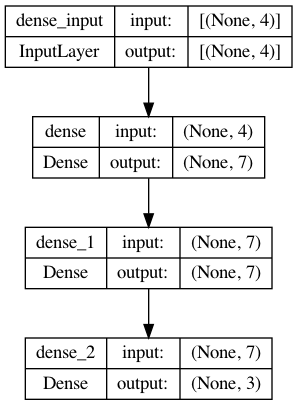

In [12]:
from tensorflow.keras.utils import plot_model
plot_model(modelA, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### <font color=blue> Method 2 - Using the .add method and adding to model


#### And above is identical to the following via the .add() method

In [13]:
# Adding layer via add() method
modelB = Sequential()
modelB.add(Dense(7, activation='relu', input_shape=(4,)))
modelB.add(Dense(7, activation='relu'))
modelB.add(Dense(3, activation='softmax'))

modelB.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 7)                 35        
                                                                 
 dense_4 (Dense)             (None, 7)                 56        
                                                                 
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
Total params: 115
Trainable params: 115
Non-trainable params: 0
_________________________________________________________________


- In the output layer you have 3 neurons cz it is multi-class classification with target having 3 classes. 
- The one hot encoding or label encoding is just part of pre-processing. Irrespective of whether we ohe or label encode during preparation of input but when defining architecture of neural network we have 3 neurons in o/p layer with softmax activation function cz we want answer in probability.

## 1.1 Training a Sequential model

### Compile and then fit

1.1 Training a Sequential model - when we r talking about loss or when we r optimizing or minimizing a loss function.

**For training a Sequential model, first configure the model using model.compile(). The main arguments here are optimizer, loss and metric:**

    a. Optimizer - RMSProps (rmsprop) or adam
    b. loss function - categorical cross-entropy  (categorical_crossentropy) for multiple-class classification problem
    c. Evaluation metrics - accuracy to evaluate the model during training and testing.

In [14]:
modelB.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#### Train the model - using model.fit() 

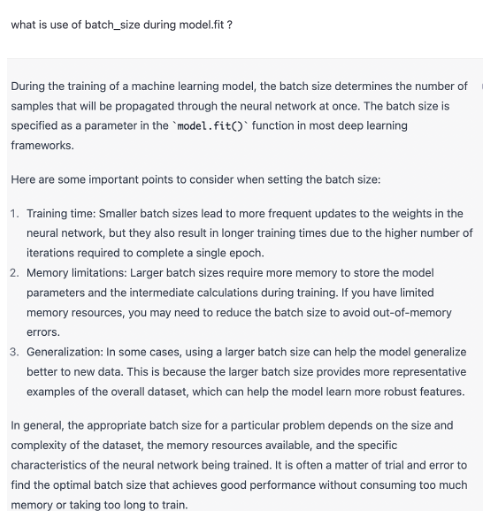

In [15]:
history = modelB.fit(X_train, y_train,
                    batch_size= 64,    # take 64 samples at a time
                     
# use of batch size -> it may reduce time complexity
                     
                    epochs= 50,
                    validation_split=0.2
                   )

Epoch 1/50
2/2 [==============================] - 0s 102ms/step - loss: 0.9180 - accuracy: 0.7640 - val_loss: 0.9225 - val_accuracy: 0.6522
Epoch 2/50
2/2 [==============================] - 0s 16ms/step - loss: 0.9010 - accuracy: 0.7640 - val_loss: 0.8967 - val_accuracy: 0.6522
Epoch 3/50
2/2 [==============================] - 0s 18ms/step - loss: 0.8909 - accuracy: 0.7978 - val_loss: 0.8940 - val_accuracy: 0.6522
Epoch 4/50
2/2 [==============================] - 0s 18ms/step - loss: 0.8839 - accuracy: 0.7753 - val_loss: 0.8771 - val_accuracy: 0.6957
Epoch 5/50
2/2 [==============================] - 0s 16ms/step - loss: 0.8772 - accuracy: 0.8315 - val_loss: 0.8643 - val_accuracy: 0.7826
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 0.8711 - accuracy: 0.8427 - val_loss: 0.8595 - val_accuracy: 0.7826
Epoch 7/50
2/2 [==============================] - 0s 19ms/step - loss: 0.8655 - accuracy: 0.8539 - val_loss: 0.8492 - val_accuracy: 0.7826
Epoch 8/50
2/2 [==========

## 1.2 Model Evaluation

In [16]:
%config InlineBackend.figure_format = 'svg' ###SVG stands for Scalable Vector Graphics 
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

1.2 Model Evaluation

The Model can be evaluated graphically by doing the following:

    Plotting the progress on loss and accuracy metrics
    Testing the model against data that has never been used for training (testing data) 

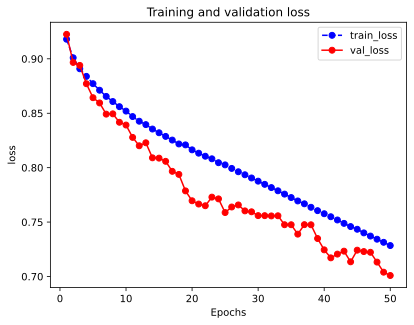

In [17]:
plot_metric(history, 'loss')

**When can you say that the model is overfitting by looking at graph of loss?**

We can say that model is overfitting when training loss will reduce but the validation loss will increase after some point/after some epochs or you can say model is overfitting when there is a huge gap b/w the training & validation loss.

By running plot_metric(history, 'accuracy') to plot the progress on accuracy.

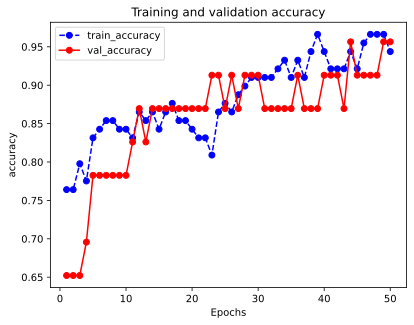

In [18]:
plot_metric(history, 'accuracy')

To test our model against test dataset

In [19]:
modelB.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.7005 - accuracy: 0.9474


[0.7005177736282349, 0.9473684430122375]

*One of simplest thing u can do to improve performance of algorithm is you can increase the epochs if problem is not very complicated. Other things are like regularization methods*

*Some of the performance can be improved by improving the data itself - e.g. normalizing the values* Neural n/w r ususually sensitive to the values. Pre-processing will help in improving performace of any algorithm.

*<b>Concepts like cross-validation are part of data so they are applicable in all the ML algorithms & particularly for smaller datasets</b>*

## 2. Functional API

### **Only the defining part is different for Sequential and Functional model,rest the compilation & training & evaluation part remains same for both models.**

- There are 2 core data structures of keras- models and layers. The layers remain the same like Dense, Dropout etc as in case of sequential model but the type of model for functional is Model() and not Sequential().
- The input has to be mentioned seperately in functional model cz we know in functional model we can have more than 1 input.
- Outputs can also be multiple. Hence output also defined seperately.
- Layers defined in similar manner as in Squential model. Define activation function in similar manner but u have to exclusively define from where input is coming cz there can be more than one input in functional model.

2. Functional API

    + The Keras functional API provides a more flexible way of defining models. 
    + In particular, it allows us to define multiple input or output models as well as models that share layers.

**Creating the same neural network using Functional API**

## 2.0 Defining/ creating a Functional API model architecture


In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense


# This returns a tensor
inputs = Input(shape=(4,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(5, activation='relu')(inputs)
x = Dense(10, activation='relu')(x)
outputs = Dense(3, activation='softmax')(x)

# This creates a model that includes
# the Input neurons and three Dense layers
model_fun_api = Model(inputs=inputs, outputs=outputs)

model_fun_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 5)                 25        
                                                                 
 dense_7 (Dense)             (None, 10)                60        
                                                                 
 dense_8 (Dense)             (None, 3)                 33        
                                                                 
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


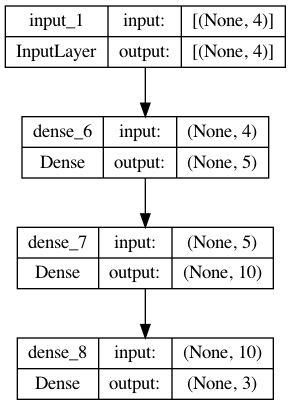

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model_fun_api, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In Functional API:

    Every layer instance is a callable on a tensor, and it returns a tensor
    Input() is used to define the input layer with input shape as an argumentshape=(4,)
    Only things we need to reference in Model() are the inputs and outputs tensors

## 2.1 Training a Functional API model

#### A Functional API model is trained just like Sequential model.

### 2.1 Training a Function API model
Such model can be trained just like Keras Sequential model

In [22]:
# First configure model using model.compile()
model_fun_api.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# Then, train the model with fit()
history = model_fun_api.fit(X_train, y_train,
                    batch_size= 64,
                    epochs= 50,
                    validation_split=0.2
                   )

Epoch 1/50
2/2 [==============================] - 0s 89ms/step - loss: 2.9415 - accuracy: 0.3933 - val_loss: 4.4919 - val_accuracy: 0.0870
Epoch 2/50
2/2 [==============================] - 0s 17ms/step - loss: 2.7852 - accuracy: 0.3933 - val_loss: 4.3115 - val_accuracy: 0.0870
Epoch 3/50
2/2 [==============================] - 0s 18ms/step - loss: 2.6769 - accuracy: 0.3933 - val_loss: 4.1815 - val_accuracy: 0.0870
Epoch 4/50
2/2 [==============================] - 0s 17ms/step - loss: 2.5954 - accuracy: 0.3933 - val_loss: 4.0703 - val_accuracy: 0.0870
Epoch 5/50
2/2 [==============================] - 0s 16ms/step - loss: 2.5228 - accuracy: 0.3933 - val_loss: 3.9595 - val_accuracy: 0.0870
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 2.4541 - accuracy: 0.3933 - val_loss: 3.8628 - val_accuracy: 0.0870
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 2.3907 - accuracy: 0.3933 - val_loss: 3.7607 - val_accuracy: 0.0870
Epoch 8/50
2/2 [===========

### 2.2 Model Evaluation

2.2 Model Evaluation

This model can be evaluated just like we did in Sequential model

By running plot_metric(history, 'loss') to plot the progress on loss.

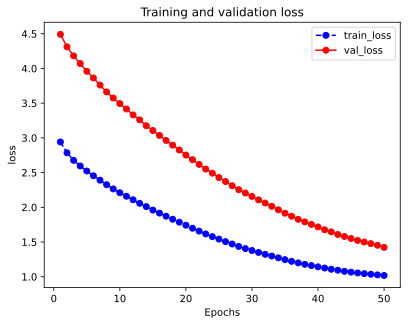

In [23]:
plot_metric(history, 'loss')

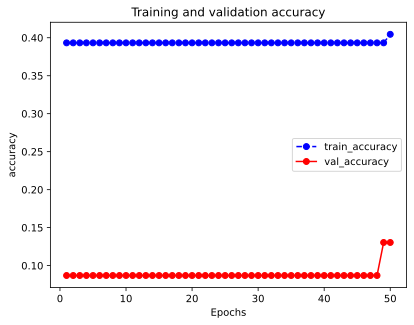

In [24]:
plot_metric(history, 'accuracy')

In [25]:
model_fun_api.evaluate(x = X_test,y = y_test)

2/2 [==============================] - 0s 1ms/step - loss: 1.0580 - accuracy: 0.3684


[1.057965874671936, 0.3684210479259491]

### 2.3 Multi-input and multi-output model

    Models with multiple inputs or multiple outputs are good use cases for the Functional API. Consider the following scenarios:

    A model with 2 inputs and 1 output
    A model with 1 input and 2 outputs
    A model with 2 input and 2 outputs

For a model with 2 inputs and 1 output. Suppose we have image data and structured data for iris flower classification. A Machine Learning model can be built as:

*<b>An example of multi-modal problem - I/P data in form of text as well as images</b>* Initially both inputs will go seperate then when u have done some formating etc (like normalization) then u can join two types of data. If u think tabular data is simpler u can have less layers for it & if u think image data is more complex but it will give u more information then u can have more layers for image data. You concatenate both i/ps and get o/p result about type/class of species.

*This kind of situation is useful when either we do not have sufficient samples or we have data available in different formats like some in tabular & some data available in image form so we may have to combine it to solve the problem*

*In medical domain it happens a lot either we do not have much samples or the modality is different*

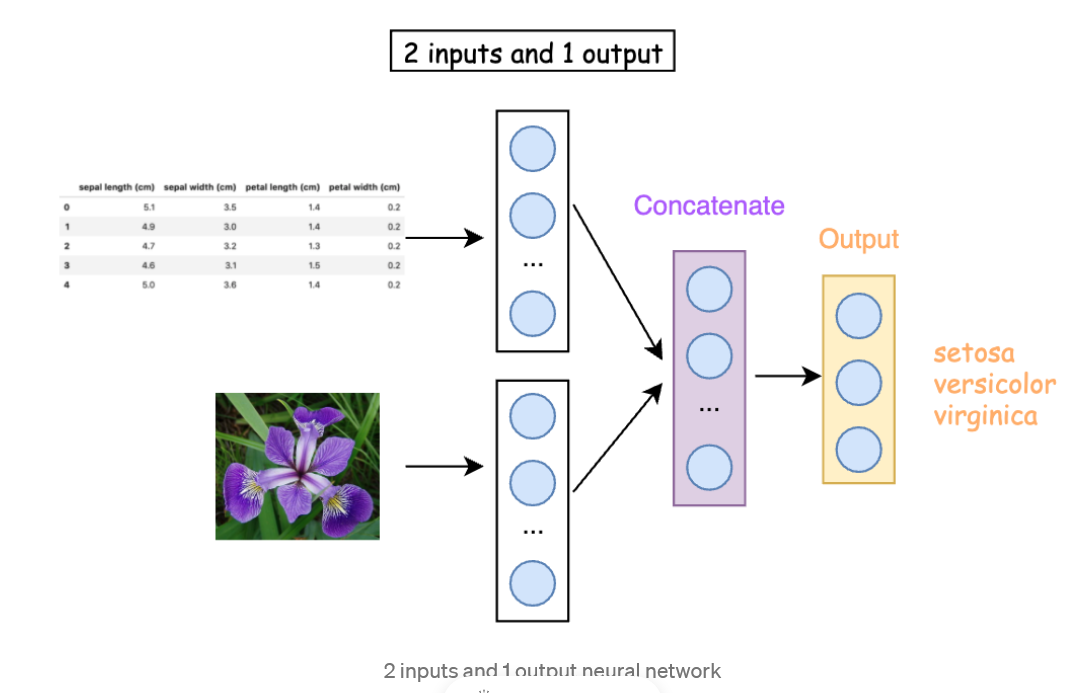

#### For the scenario with 2 inputs and 1 output

##### When there are 2 different inputs:
    
    we concatenate them using concatenate([x_1, x_2]). 
    To define a model with multiple inputs, we just need to specify a list of inputs, where inputs=[input_structure, input_image].

Concatenate layer present in layers module of keras.

In [26]:
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structure = Input(shape=(4,), name='input_structure')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structure)
x_2 = Dense(100, activation='relu')(input_image)

c = concatenate([x_1, x_2])

outputs = Dense(3, activation='softmax', name='outputs')(c)

model = Model(inputs=[input_structure, input_image], outputs=outputs)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structure (InputLayer)   [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_9 (Dense)                (None, 10)           50          ['input_structure[0][0]']        
                                                                                                  
 dense_10 (Dense)               (None, 100)          25700       ['input_image[0][0]']            
                                                                                            

In Sequential we have a stacked structure while in Functional we can also have a branched structure as shown below when having multiple inputs.

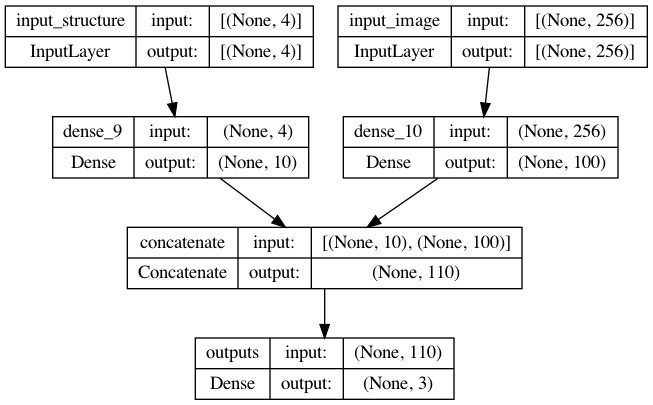

In [27]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 1 input and 2 outputs

For a model with 1 input and 2 outputs. Suppose we only have image data and the task is to identify whether the given image is a flower and if yes, what type of iris flower it is?

Here data is provided to you in only image format but here u have 2 objectives - 1st to identify whether image has a flower or not and 2nd objective is to identify the species of flower.

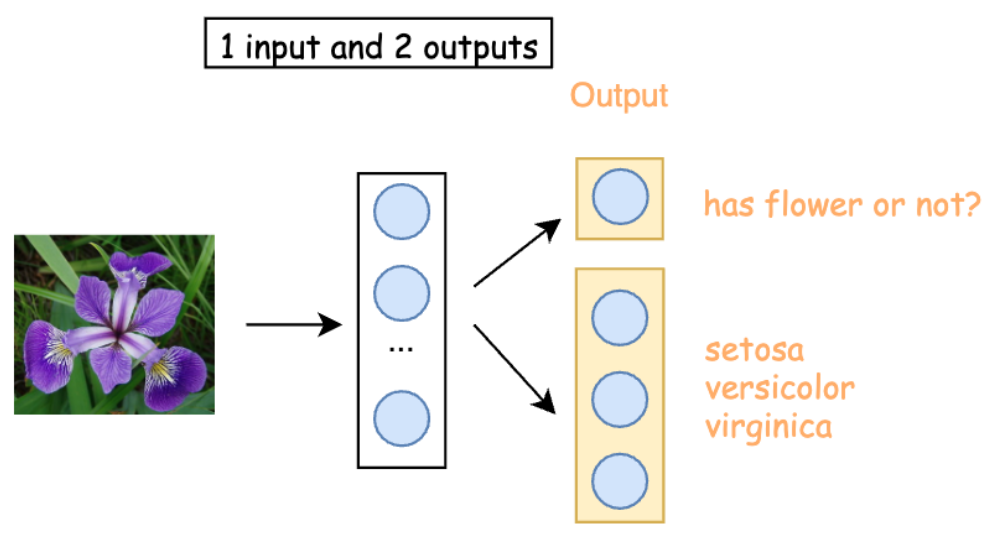

In [28]:
## 1 inputs, 2 output

from tensorflow.keras.layers import concatenate

# only one input
input_image = Input(shape=(256,), name='input_image')

# middle layer
x = Dense(300, activation='relu')(input_image)

# output layer
output_1 = Dense(1, activation='sigmoid', name='output_1')(x)  # flower or not so sigmoid
output_2 = Dense(3, activation='softmax', name='output_2')(x)  # class of flower so softmax

model = Model(inputs=input_image, outputs=[output_1, output_2])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_11 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                                  
 output_1 (Dense)               (None, 1)            301         ['dense_11[0][0]']               
                                                                                                  
 output_2 (Dense)               (None, 3)            903         ['dense_11[0][0]']               
                                                                                            

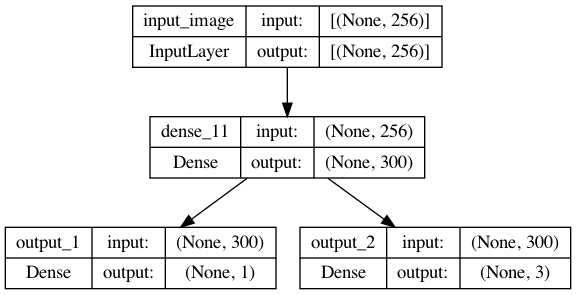

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

#### For the scenario with 2 inputs and 2 outputs

In [30]:
## 2 inputs, 2 outputs
from tensorflow.keras.layers import concatenate

# 2 inputs, one structured data, the other image data
input_structured = Input(shape=(4,), name='input_structured')
input_image = Input(shape=(256,), name='input_image')

# middle layers
x_1 = Dense(10, activation='relu')(input_structured)
x_2 = Dense(300, activation='relu')(input_image)

c = concatenate([x_1, x_2])

# output layser
output_1 = Dense(1, activation='sigmoid', name='output_1')(c)
output_2 = Dense(3, activation='softmax', name='output_2')(c)

model = Model(inputs=[input_structured, input_image], outputs=[output_1, output_2])

model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_structured (InputLayer)  [(None, 4)]          0           []                               
                                                                                                  
 input_image (InputLayer)       [(None, 256)]        0           []                               
                                                                                                  
 dense_12 (Dense)               (None, 10)           50          ['input_structured[0][0]']       
                                                                                                  
 dense_13 (Dense)               (None, 300)          77100       ['input_image[0][0]']            
                                                                                            

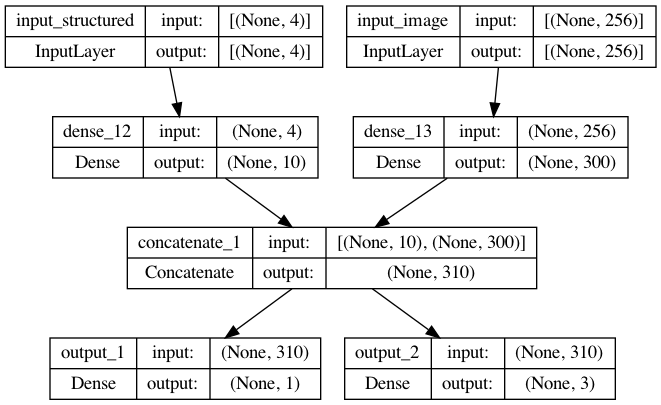

In [31]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Only architecture part changes based on modality - multiple inputs / outputs etc based on problem rest of the compilation and training and evaluation part remains same for the model. The information/weights which are generated everytime based on backward pass will again use this same architecture to move information from one layer to another (i.e. for forward pass).